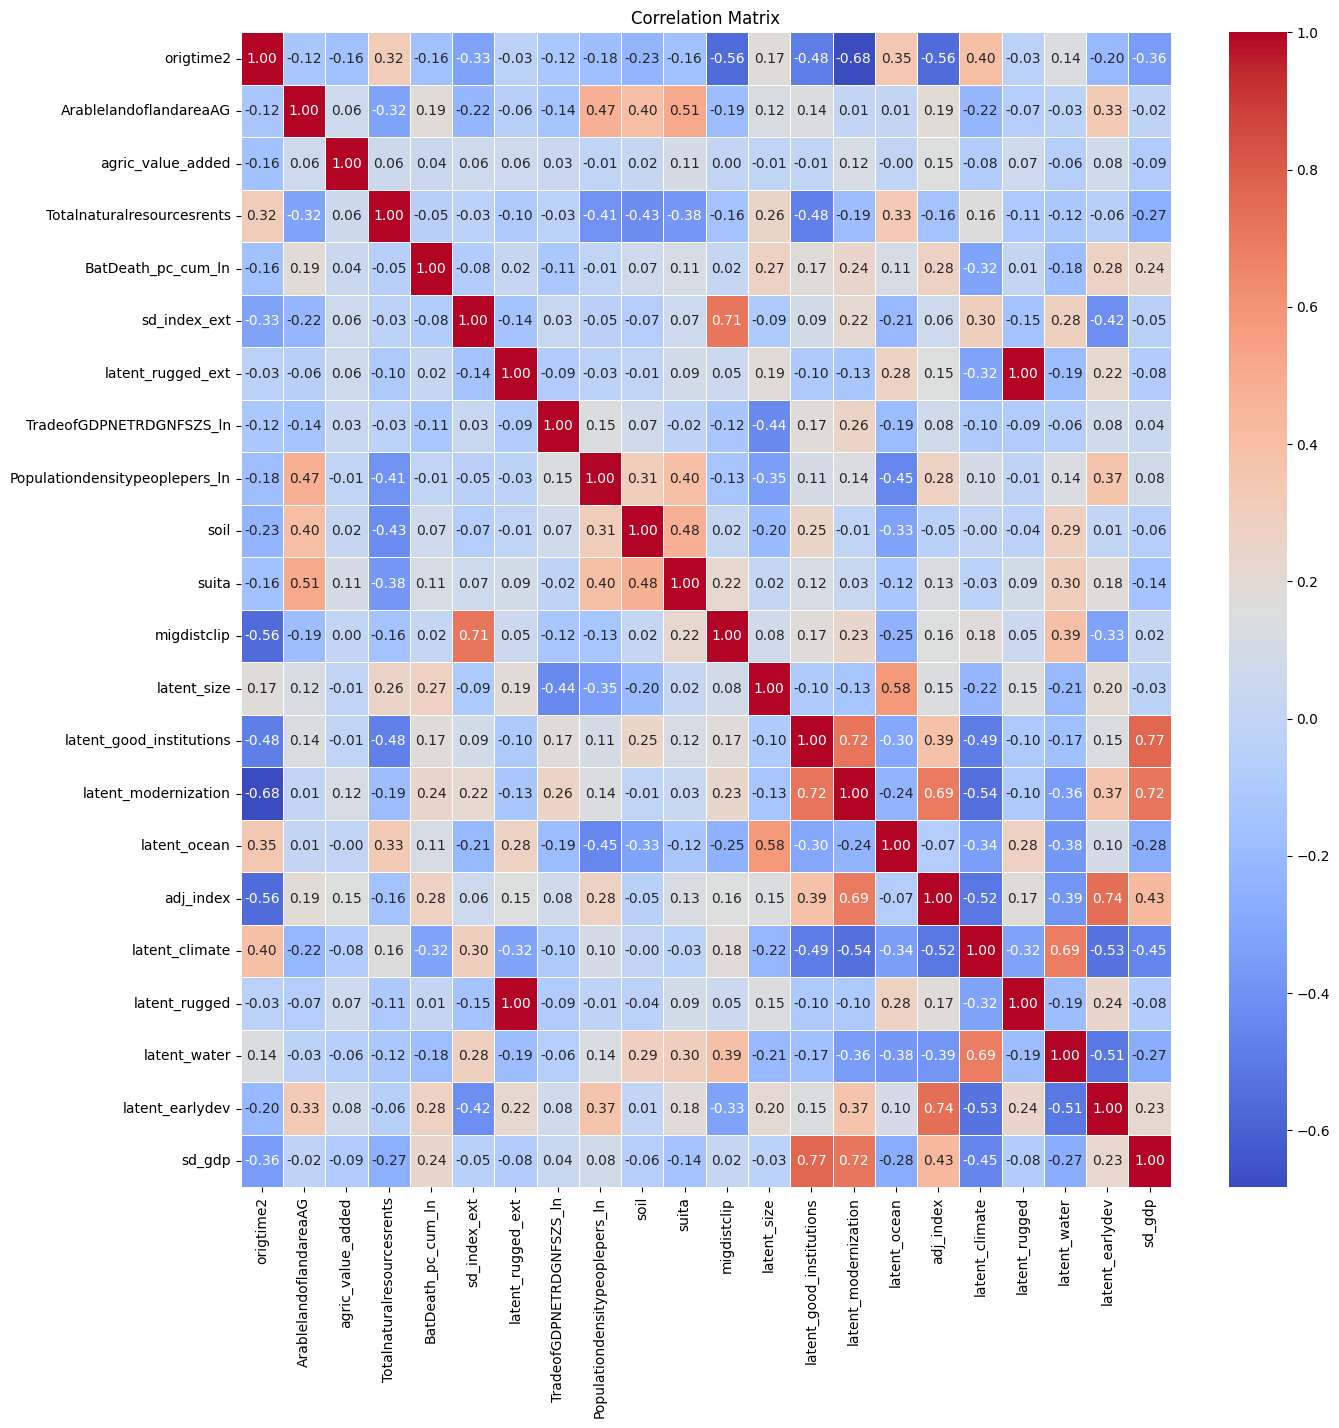

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('daniel_test_edited.csv')

# Select the relevant columns for x
#df.dropna(subset=['x', 'x'], inplace=True)
x = df[['origtime2', 'ArablelandoflandareaAG','agric_value_added','Totalnaturalresourcesrents','BatDeath_pc_cum_ln','sd_index_ext','latent_rugged_ext','TradeofGDPNETRDGNFSZS_ln','Populationdensitypeoplepers_ln','soil', 'suita', 'migdistclip','latent_size', 'latent_good_institutions', 'latent_modernization', 'latent_ocean', 'adj_index', 'latent_climate', 'latent_rugged', 'latent_water', 'latent_earlydev', 'sd_gdp']]
#x = df[['x', 'x', 'x']]
# Compute the correlation matrix
correlation_matrix = x.corr()

plt.figure(figsize=(15, 15))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

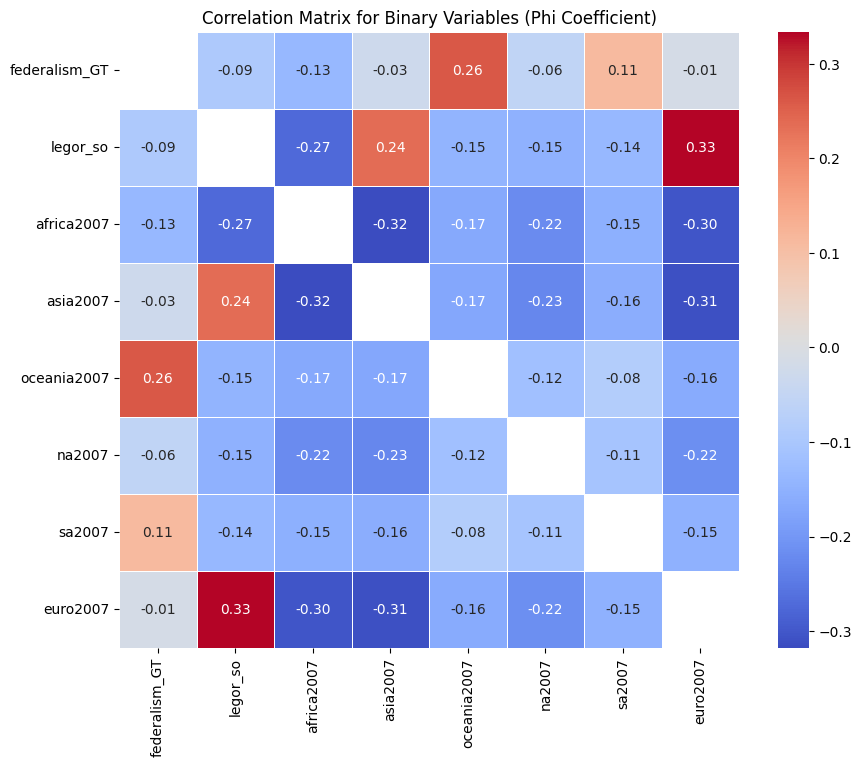

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('daniel_test_edited.csv')

# Select the relevant columns for x (all binary variables)
x = df[['federalism_GT', 'legor_so', 'africa2007', 'asia2007', 'oceania2007', 'na2007', 'sa2007', 'euro2007']]

# Compute the phi coefficient correlation matrix
correlation_matrix = pd.DataFrame(index=x.columns, columns=x.columns)

for var1 in x.columns:
    for var2 in x.columns:
        if var1 != var2:
            # Create a contingency table
            contingency_table = pd.crosstab(x[var1], x[var2])
            
            # Calculate the phi coefficient
            n11 = contingency_table.iloc[1, 1]
            n00 = contingency_table.iloc[0, 0]
            n10 = contingency_table.iloc[1, 0]
            n01 = contingency_table.iloc[0, 1]
            phi_coefficient = (n11 * n00 - n10 * n01) / ((n11 + n10) * (n01 + n00) * (n11 + n01) * (n10 + n00))**0.5
            
            correlation_matrix.loc[var1, var2] = phi_coefficient

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Binary Variables (Phi Coefficient)")
plt.show()

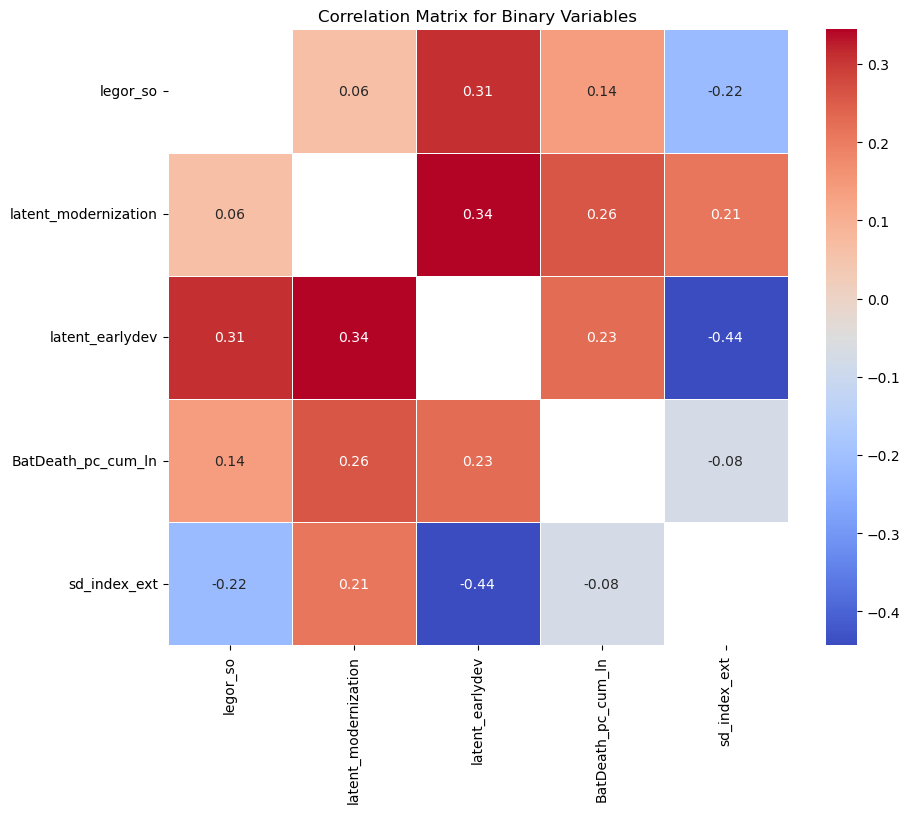

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# Load your data
df = pd.read_csv('daniel_test.csv')

# Select the relevant columns for x (all binary variables)
df.dropna(subset=['euro2007', 'sa2007', 'na2007', 'africa2007', 'legor_so', 'latent_modernization', 'latent_climate', 'latent_earlydev', 'BatDeath_pc_cum_ln', 'sd_index_ext'], inplace=True)
x = df[['legor_so', 'latent_modernization', 'latent_earlydev', 'BatDeath_pc_cum_ln', 'sd_index_ext']]

# Initialize an empty correlation matrix
correlation_matrix = pd.DataFrame(index=x.columns, columns=x.columns)

# Compute point-biserial correlation for each pair of variables
for var1 in x.columns:
    for var2 in x.columns:
        if var1 != var2:
            correlation, _ = pointbiserialr(x[var1], x[var2])
            correlation_matrix.loc[var1, var2] = correlation

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Binary Variables")
plt.show()


Coefficients:
         Variable  Coefficient
0  latent_climate     2.108252
1   latent_rugged     1.288935
2       adj_index    -2.029583
3    sd_index_ext     1.480185

Mean Squared Error: 35.291473858377174
R-squared: 0.5466168730954744


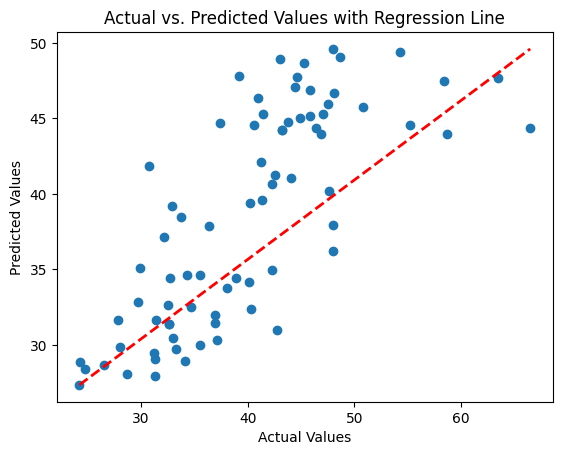

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('daniel_test_edited.csv')

# Drop rows with missing values
df.dropna(subset=['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext', 'gini_disp_ext'], inplace=True)

# Select independent variables (X) and dependent variable (y)
X = df[['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext']]
y = df['gini_disp_ext']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print coefficients for each independent variable
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': regressor.coef_})
print("Coefficients:")
print(coefficients)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Plot outputs with the final regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()



Iteration: 0
Iteration: 1
Coefficients:
         Variable  Coefficient
0  latent_climate     1.933112
1   latent_rugged     1.547007
2       adj_index    -1.839435
3    sd_index_ext     1.184693

Mean Squared Error: 26.789928737242008
R-squared: 0.6480240504691257


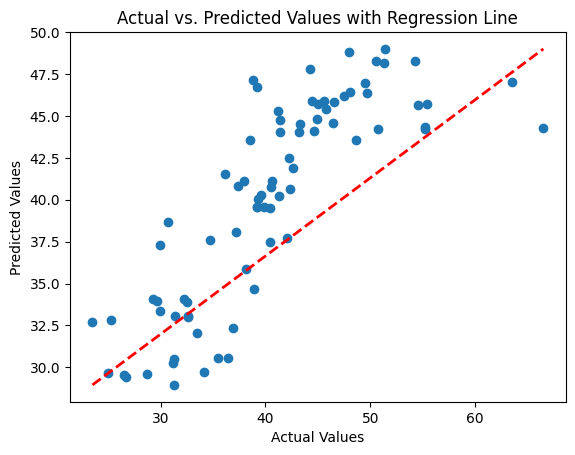

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.neighbors.base
import matplotlib.pyplot as plt
import sklearn.neighbors._base # this is from `scikit-learn` instead of `sklearn`
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

# Load your data
df = pd.read_csv('daniel_test_edited.csv')

#Impute missing data using MissForest
mf = MissForest(max_iter=10, verbose=0,criterion='squared_error')
#remove header and first columns that is not numeric
df_mf=df.drop(columns='country')
df_mf=df_mf.drop(df_mf.index[0])
#Create a numpy array
df_mfn=df_mf.to_numpy()
df_mfnn=mf.fit_transform(df_mfn)
##Rebuild the DataFrame
df_imp=pd.DataFrame(df_mfnn, columns=df_mf.columns)

# Drop rows with missing values
#df.dropna(subset=['legor_so', 'latent_modernization', 'latent_earlydev', 'BatDeath_pc_cum_ln', 'sd_index_ext', 'gini_disp_ext'], inplace=True)


# Select independent variables (X) and dependent variable (y)
X = df_imp[['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext']]
y = df_imp['gini_disp_ext']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print coefficients for each independent variable
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': regressor.coef_})
print("Coefficients:")
print(coefficients)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Plot outputs with the final regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()

Coefficients:
         Variable  Coefficient
0  latent_climate     1.842348
1   latent_rugged     1.190968
2       adj_index    -2.245862
3    sd_index_ext     1.491033

Mean Squared Error: 29.07475381886108
R-squared: 0.5995224083462242


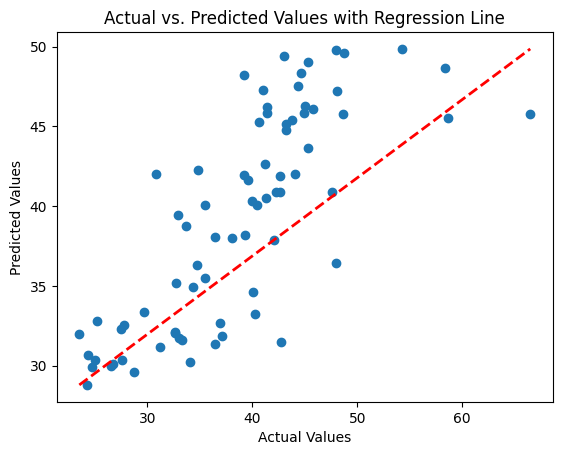

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('daniel_test_edited.csv')

# Drop rows with missing values
df.dropna(subset=['latent_rugged', 'latent_climate', 'latent_earlydev', 'adj_index', 'gini_disp_ext'], inplace=True)

# Select independent variables (X) and dependent variable (y)
X = df[['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext']]
y = df['gini_disp_ext']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print coefficients for each independent variable
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': regressor.coef_})
print("Coefficients:")
print(coefficients)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Plot outputs with the final regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()


['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext']
[[ 1.54952235  1.28607046 -2.39891598  1.39065043]]

Mean Squared Error: 23.741647664193568
R-squared: 0.64834330963083


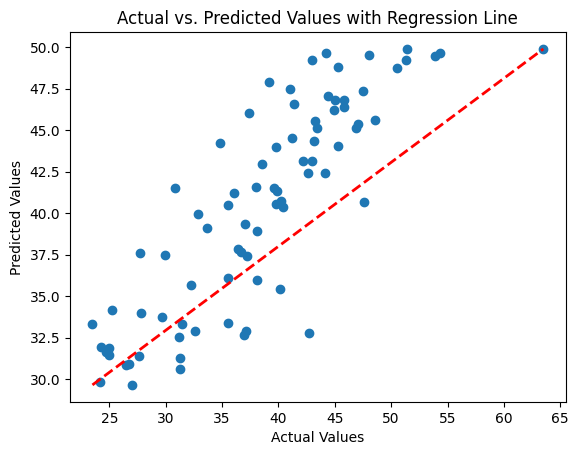

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('daniel_test_edited.csv')

# Split the dataset into features (X) and target variable (y)
columns_to_drop = ['country']  # Add the columns you want to drop

X_imp =df[['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext', 'gini_disp_ext']]
imputer = SimpleImputer(strategy='mean')  # You can use 'mean', 'median', 'most_frequent', or a constant value
df_imputed = imputer.fit_transform(X_imp)
X = df_imputed[:,[0,1,2,3]]
y = df_imputed[:,[4]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create linear regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print coefficients for each independent variable
#X_imp.drop(columns=['gini_disp_ext'])
X_cc =df[['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext']]
#coefficients = pd.DataFrame({'Variable': list(X_cc), 'Coefficient': regressor.coef_})
#print("Coefficients:")
#print(coefficients)
print(list(X_cc))
print(regressor.coef_)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# Plot outputs with the final regression line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()


Average Mean Squared Error: 29.521515146050195
Average R squared: 0.34847745769093963


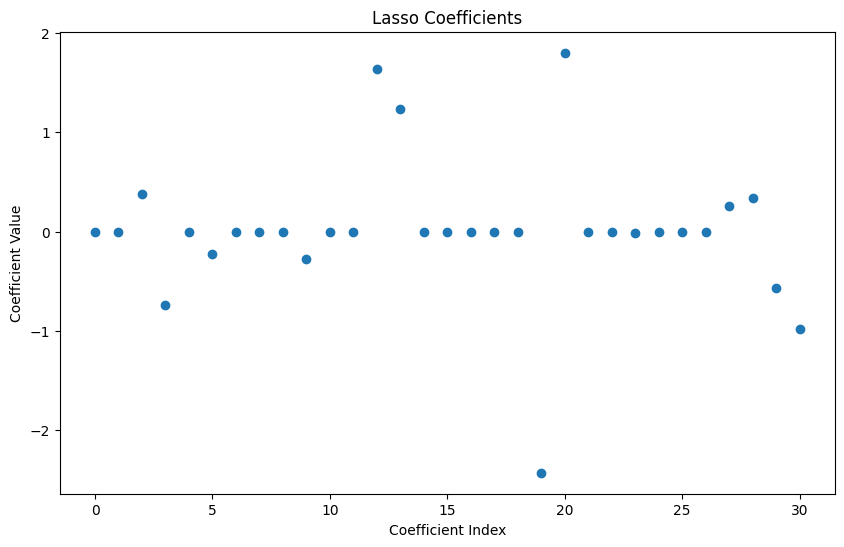

In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming X contains your features and y contains the Gini scores
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('daniel_test_edited.csv')
# Drop rows with missing values
df.dropna(subset=['latent_modernization', 'latent_earlydev',   'sd_index_ext', 'gini_disp_ext'], inplace=True)

# Split the dataset into features (X) and target variable (y)
columns_to_drop = ['country', 'gini_disp_ext']  # Add the columns you want to drop
X = df.drop(columns=columns_to_drop)
y = df['gini_disp_ext']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Lasso regression model
lasso_model = Lasso(alpha=0.5)  # You can adjust the alpha parameter for stronger or weaker regularization

# Lists to store cross-validation results
mse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    lasso_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred)
    r_squared_scores.append(r_squared)
        
# Display the average mean squared error across folds
print(f'Average Mean Squared Error: {np.mean(mse_scores)}')
# Display the average mean squared error across folds
print(f'Average R squared: {np.mean(r_squared_scores)}')

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, marker='o', linestyle='None')
plt.title('Lasso Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()




c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.321e+01, tolerance: 1.049e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.585e+01, tolerance: 8.406e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best Alpha: 0.5
Best Max Iterations: 100
Corresponding Mean Squared Error: 29.521515146050195
Corresponding R-squared: 0.5732637726744916

Coefficients for the Best Alpha and Max Iterations:
federalism_GT: 0.0
year: 0.0
origtime2: 0.3776588496580284
legor_so: -0.7383470758701852
suita: -0.0
ArablelandoflandareaAG: -0.23074535273902547
migdistclip: 0.0
agric_value_added: 0.0
Populationdensitypeoplepers_ln: -0.0
TradeofGDPNETRDGNFSZS_ln: -0.274488047085314
Totalnaturalresourcesrents: -0.0
BatDeath_pc_cum_ln: 0.0
sd_index_ext: 1.6414341052180772
latent_rugged_ext: 1.2374341091852594
latent_size: 0.0
soil: -0.0
latent_good_institutions: -0.0
latent_modernization: -0.0
latent_ocean: -0.0
adj_index: -2.43113790353933
latent_climate: 1.8027359665431368
latent_rugged: 0.0
latent_water: -0.0
latent_earlydev: -0.01007234878021204
africa2007: -0.0
asia2007: -0.0
oceania2007: -0.0
na2007: 0.2608860353543711
sa2007: 0.3419667967318607
euro2007: -0.5654604227954894
sd_gdp: -0.9862856369810001

Selec

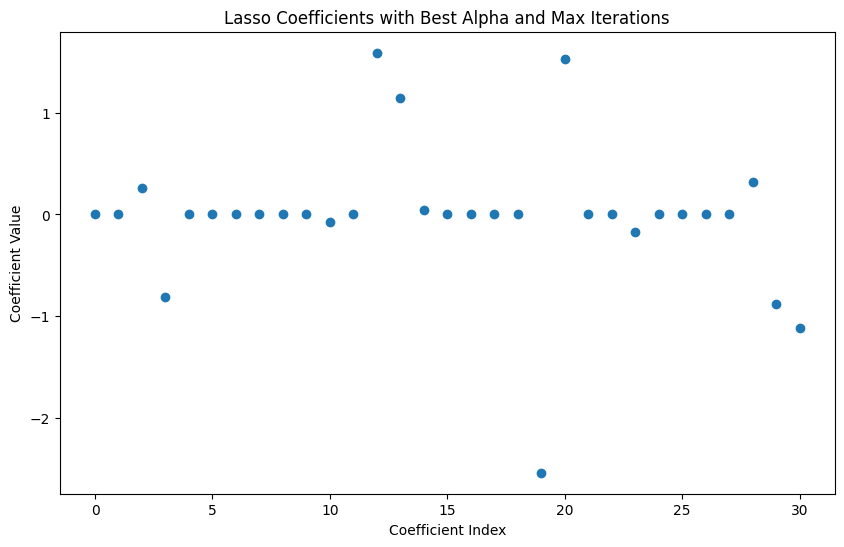

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming X contains your features and y contains the Gini scores
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('daniel_test_edited.csv')
# Drop rows with missing values
df.dropna(subset=['latent_modernization', 'latent_earlydev',   'sd_index_ext', 'gini_disp_ext'], inplace=True)

# Split the dataset into features (X) and target variable (y)
columns_to_drop = ['country', 'gini_disp_ext']  # Add the columns you want to drop
X = df.drop(columns=columns_to_drop)
y = df['gini_disp_ext']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a range of alpha values and max_iter values to try
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
max_iters = [100, 500, 1000, 5000, 10000]

# Dictionary to store results for each alpha and max_iter combination
results = {}

# Dictionary to store coefficients for each alpha and max_iter combination
coefficients_mapping = {}

# Dictionary to store selected features for each alpha and max_iter combination
selected_features_mapping = {}

# Dictionary to store R-squared values for each alpha and max_iter combination
r_squared_mapping = {}

# Threshold for feature selection based on coefficient magnitude
coeff_threshold = 0.01  # Adjust as needed

# Number of top features to select
top_n_features = 4  # Adjust as needed

# Iterate through different alpha values and max_iter values
for alpha in alphas:
    for max_iter in max_iters:
        mse_scores = []
        r_squared_scores = []

        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize Lasso regression model
            lasso_model = Lasso(alpha=alpha, max_iter=max_iter)

            # Fit the model on the training data
            lasso_model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = lasso_model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r_squared_scores.append(r_squared)

        # Calculate average mean squared error and R-squared across folds
        avg_mse = np.mean(mse_scores)
        avg_r_squared = np.mean(r_squared_scores)

        # Store the results for this alpha and max_iter combination
        results[(alpha, max_iter)] = avg_mse
        r_squared_mapping[(alpha, max_iter)] = avg_r_squared

        # Store the coefficients for this alpha and max_iter combination
        coefficients_mapping[(alpha, max_iter)] = dict(zip(X.columns, lasso_model.coef_))

        # Select features based on coefficient magnitude
        selected_features = [feature for feature, coefficient in sorted(zip(X.columns, lasso_model.coef_), key=lambda x: abs(x[1]), reverse=True)[:top_n_features]]
        selected_features_mapping[(alpha, max_iter)] = selected_features

# Find the alpha and max_iter with the lowest average mean squared error
best_params = min(results, key=results.get)
best_alpha, best_max_iter = best_params
best_mse = results[best_params]
best_r_squared = r_squared_mapping[best_params]

# Display the best alpha, max_iter, and their corresponding mean squared error and R-squared
print(f'Best Alpha: {best_alpha}')
print(f'Best Max Iterations: {best_max_iter}')
print(f'Corresponding Mean Squared Error: {best_mse}')
print(f'Corresponding R-squared: {best_r_squared}')

# Display coefficients for the best alpha and max_iter
best_coefficients = coefficients_mapping[best_params]
print("\nCoefficients for the Best Alpha and Max Iterations:")
for feature, coefficient in best_coefficients.items():
    print(f'{feature}: {coefficient}')

# Display selected features for the best alpha and max_iter
selected_features = selected_features_mapping[best_params]
print("\nSelected Features for the Best Alpha and Max Iterations:")
print(selected_features)

# Visualize the coefficients using the best alpha and max_iter
lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_scaled, y)

plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, marker='o', linestyle='None')
plt.title('Lasso Coefficients with Best Alpha and Max Iterations')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.810e+02, tolerance: 8.976e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+03, tolerance: 1.024e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best Alpha: 0.1
Best Max Iterations: 500
Corresponding Mean Squared Error: 25.511315205673547
Corresponding R-squared: 0.6192510119978818

Coefficients for the Best Alpha and Max Iterations:
federalism_GT: 0.24386874081328455
year: 0.0
origtime2: 0.671399073974291
legor_so: -0.9943038974724699
suita: -0.0
ArablelandoflandareaAG: -0.24770582257676338
migdistclip: 0.0
agric_value_added: 0.0
Populationdensitypeoplepers_ln: 0.0
TradeofGDPNETRDGNFSZS_ln: 0.24745831129856294
Totalnaturalresourcesrents: -0.8762143424476884
BatDeath_pc_cum_ln: 0.22321158857053397
sd_index_ext: 2.3584060548459003
latent_rugged_ext: 1.1156479316692445
latent_size: 0.9667694226087821
soil: -0.35649315803834464
latent_good_institutions: 0.0
latent_modernization: 0.0
latent_ocean: -0.836779754838012
adj_index: -2.802062921186885
latent_climate: 1.2497801467124354
latent_rugged: 0.0
latent_water: -0.3003582534869347
latent_earlydev: -0.0
africa2007: 0.0
asia2007: -0.0
oceania2007: -0.2578374255560851
na2007: 0.0
sa2

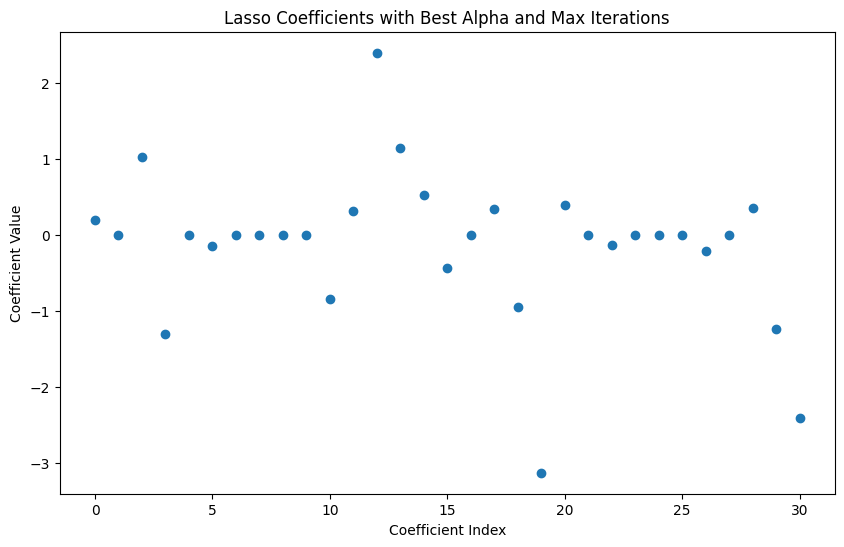

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#from sklearn.neighbors.base
import matplotlib.pyplot as plt
import sklearn.neighbors._base # this is from `scikit-learn` instead of `sklearn`
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

# Load your data
df = pd.read_csv('daniel_test_edited.csv')
# Drop rows with missing values
df.dropna(subset=[ 'sd_index_ext', 'adj_index'], inplace=True)

#Impute missing data using MissForest
mf = MissForest(max_iter=10, verbose=0,criterion='squared_error')
#remove header and first columns that is not numeric
df_mf=df.drop(columns='country')
df_mf=df_mf.drop(df_mf.index[0])
#Create a numpy array
df_mfn=df_mf.to_numpy()
df_mfnn=mf.fit_transform(df_mfn)
##Rebuild the DataFrame
df_imp=pd.DataFrame(df_mfnn, columns=df_mf.columns)

# Select independent variables (X) and dependent variable (y)
#X = df_imp[['latent_climate', 'latent_rugged', 'adj_index', 'sd_index_ext']]
X = df_imp.drop(columns=['gini_disp_ext'])
y = df_imp['gini_disp_ext']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a range of alpha values and max_iter values to try
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
max_iters = [100, 500, 1000, 5000, 10000]

# Dictionary to store results for each alpha and max_iter combination
results = {}

# Dictionary to store coefficients for each alpha and max_iter combination
coefficients_mapping = {}

# Dictionary to store selected features for each alpha and max_iter combination
selected_features_mapping = {}

# Dictionary to store R-squared values for each alpha and max_iter combination
r_squared_mapping = {}

# Threshold for feature selection based on coefficient magnitude
coeff_threshold = 0.01  # Adjust as needed

# Number of top features to select
top_n_features = 4  # Adjust as needed

# Iterate through different alpha values and max_iter values
for alpha in alphas:
    for max_iter in max_iters:
        mse_scores = []
        r_squared_scores = []

        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize Lasso regression model
            lasso_model = Lasso(alpha=alpha, max_iter=max_iter)

            # Fit the model on the training data
            lasso_model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = lasso_model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r_squared_scores.append(r_squared)

        # Calculate average mean squared error and R-squared across folds
        avg_mse = np.mean(mse_scores)
        avg_r_squared = np.mean(r_squared_scores)

        # Store the results for this alpha and max_iter combination
        results[(alpha, max_iter)] = avg_mse
        r_squared_mapping[(alpha, max_iter)] = avg_r_squared

        # Store the coefficients for this alpha and max_iter combination
        coefficients_mapping[(alpha, max_iter)] = dict(zip(X.columns, lasso_model.coef_))

        # Select features based on coefficient magnitude
        selected_features = [feature for feature, coefficient in sorted(zip(X.columns, lasso_model.coef_), key=lambda x: abs(x[1]), reverse=True)[:top_n_features]]
        selected_features_mapping[(alpha, max_iter)] = selected_features

# Find the alpha and max_iter with the lowest average mean squared error
best_params = min(results, key=results.get)
best_alpha, best_max_iter = best_params
best_mse = results[best_params]
best_r_squared = r_squared_mapping[best_params]

# Display the best alpha, max_iter, and their corresponding mean squared error and R-squared
print(f'Best Alpha: {best_alpha}')
print(f'Best Max Iterations: {best_max_iter}')
print(f'Corresponding Mean Squared Error: {best_mse}')
print(f'Corresponding R-squared: {best_r_squared}')

# Display coefficients for the best alpha and max_iter
best_coefficients = coefficients_mapping[best_params]
print("\nCoefficients for the Best Alpha and Max Iterations:")
for feature, coefficient in best_coefficients.items():
    print(f'{feature}: {coefficient}')

# Display selected features for the best alpha and max_iter
selected_features = selected_features_mapping[best_params]
print("\nSelected Features for the Best Alpha and Max Iterations:")
print(selected_features)

# Visualize the coefficients using the best alpha and max_iter
lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_scaled, y)

plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, marker='o', linestyle='None')
plt.title('Lasso Coefficients with Best Alpha and Max Iterations')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.436e+00, tolerance: 9.457e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+00, tolerance: 9.104e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\programdata\pymol\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Best Alpha: 0.2
Best Max Iterations: 500
Corresponding Mean Squared Error: 26.669201061817205
Corresponding R-squared: 0.5755261468790442

Coefficients for the Best Alpha and Max Iterations:
federalism_GT: 0.0
year: 0.0
origtime2: 1.235877896477641
legor_so: -0.6941410396440643
suita: -0.0
ArablelandoflandareaAG: -0.3108963792321075
migdistclip: 0.0
agric_value_added: 0.0
Populationdensitypeoplepers_ln: -0.0
TradeofGDPNETRDGNFSZS_ln: -0.4769044148354803
Totalnaturalresourcesrents: -0.23225429456102584
BatDeath_pc_cum_ln: 0.15169220826187943
sd_index_ext: 1.7796350482923913
latent_rugged_ext: 1.893530059942195
latent_size: 0.600966391488238
soil: -0.21603057594032235
latent_good_institutions: -0.0
latent_modernization: -0.0
latent_ocean: -0.966189086207698
adj_index: -2.508183843887069
latent_climate: 1.931043048365481
latent_rugged: 0.0
latent_water: -0.5016295745689385
latent_earlydev: -0.4601271857854211
africa2007: -0.08211249785736995
asia2007: 0.0
oceania2007: -0.0
na2007: 0.61189

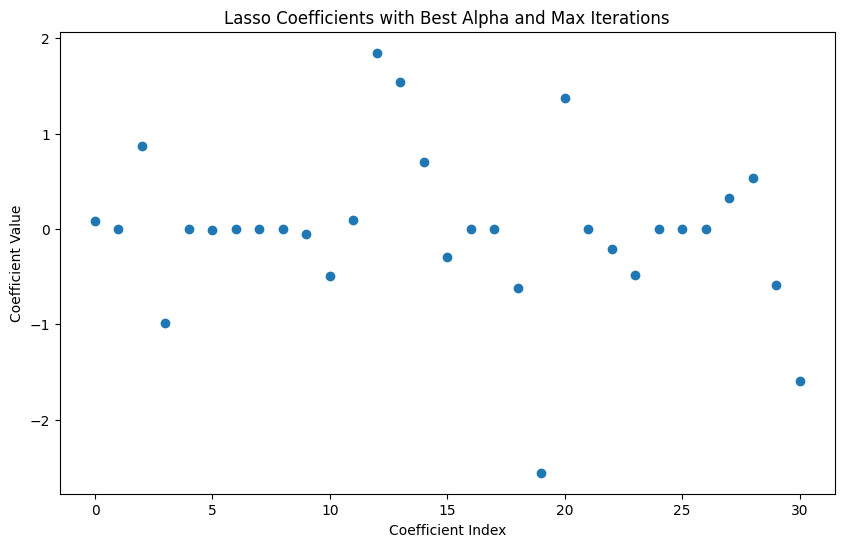

In [200]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming X contains your features and y contains the Gini scores
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('daniel_test_edited.csv')
df.dropna(subset=['latent_modernization',  'adj_index',  'sd_index_ext', 'gini_disp_ext'], inplace=True)
#df.dropna(subset=['gini_disp_ext'], inplace=True)

# Split the dataset into features (X) and target variable (y)
columns_to_drop = ['gini_disp_ext', 'country']  # Add the columns you want to drop
X = df.drop(columns=columns_to_drop)
y = df['gini_disp_ext']

# Impute missing values
#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)
imputer = KNNImputer(n_neighbors=10)
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a range of alpha values and max_iter values to try
alphas = [0.01, 0.05, 0.08, 0.1, 0.2, 0.5, 1]
max_iters = [100, 500, 1000, 5000, 10000]

# Dictionary to store results for each alpha and max_iter combination
results = {}

# Dictionary to store coefficients for each alpha and max_iter combination
coefficients_mapping = {}

# Dictionary to store selected features for each alpha and max_iter combination
selected_features_mapping = {}

# Dictionary to store R-squared values for each alpha and max_iter combination
r_squared_mapping = {}

# Threshold for feature selection based on coefficient magnitude
coeff_threshold = 0.01  # Adjust as needed

# Number of top features to select
top_n_features = 4  # Adjust as needed

# Iterate through different alpha values and max_iter values
for alpha in alphas:
    for max_iter in max_iters:
        mse_scores = []
        r_squared_scores = []

        # Perform k-fold cross-validation
        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize Lasso regression model
            lasso_model = Lasso(alpha=alpha, max_iter=max_iter)

            # Fit the model on the training data
            lasso_model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = lasso_model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r_squared_scores.append(r_squared)

        # Calculate average mean squared error and R-squared across folds
        avg_mse = np.mean(mse_scores)
        avg_r_squared = np.mean(r_squared_scores)

        # Store the results for this alpha and max_iter combination
        results[(alpha, max_iter)] = avg_mse
        r_squared_mapping[(alpha, max_iter)] = avg_r_squared

        # Store the coefficients for this alpha and max_iter combination
        coefficients_mapping[(alpha, max_iter)] = dict(zip(X.columns, lasso_model.coef_))

        # Select features based on coefficient magnitude
        selected_features = [feature for feature, coefficient in sorted(zip(X.columns, lasso_model.coef_), key=lambda x: abs(x[1]), reverse=True)[:top_n_features]]
        selected_features_mapping[(alpha, max_iter)] = selected_features

# Find the alpha and max_iter with the lowest average mean squared error
best_params = min(results, key=results.get)
best_alpha, best_max_iter = best_params
best_mse = results[best_params]
best_r_squared = r_squared_mapping[best_params]

# Display the best alpha, max_iter, and their corresponding mean squared error and R-squared
print(f'Best Alpha: {best_alpha}')
print(f'Best Max Iterations: {best_max_iter}')
print(f'Corresponding Mean Squared Error: {best_mse}')
print(f'Corresponding R-squared: {best_r_squared}')

# Display coefficients for the best alpha and max_iter
best_coefficients = coefficients_mapping[best_params]
print("\nCoefficients for the Best Alpha and Max Iterations:")
for feature, coefficient in best_coefficients.items():
    print(f'{feature}: {coefficient}')

# Display selected features for the best alpha and max_iter
selected_features = selected_features_mapping[best_params]
print("\nSelected Features for the Best Alpha and Max Iterations:")
print(selected_features)

# Visualize the coefficients using the best alpha and max_iter
lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_scaled, y)

plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, marker='o', linestyle='None')
plt.title('Lasso Coefficients with Best Alpha and Max Iterations')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()


Mean Squared Error: 33.80895306948013
R-squared: 0.5466168730954744


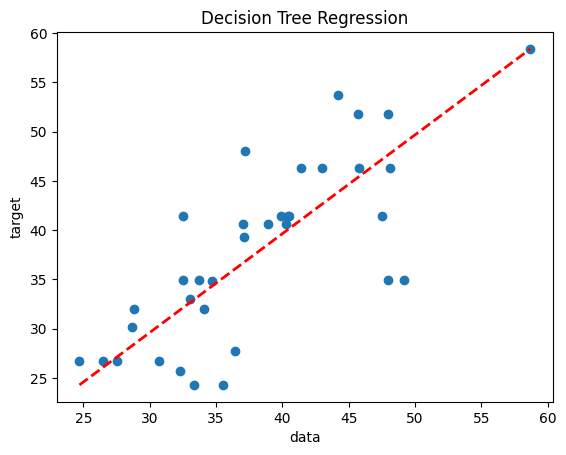

In [208]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
# Visualizing the decision tree structure
from sklearn.tree import export_graphviz  

# Load your dataset
# Assuming X contains your features and y contains the Gini scores
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('daniel_test_edited.csv')
df.dropna(subset=['latent_modernization',  'adj_index',  'sd_index_ext', 'gini_disp_ext'], inplace=True)
#df.dropna(subset=['gini_disp_ext'], inplace=True)

# Split the dataset into features (X) and target variable (y)
columns_to_drop = ['gini_disp_ext', 'country']  # Add the columns you want to drop
X = df.drop(columns=columns_to_drop)
y = df['gini_disp_ext']

# Impute missing values
#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)
imputer = KNNImputer(n_neighbors=10)
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


        # Perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Create a random dataset
            rng = np.random.RandomState(1)

            # Fit regression model
            regr_DT = DecisionTreeRegressor(max_depth=5)
            regr_DT.fit(X_train, y_train)

            # Predict
            y_pred = regr_DT.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)

            # Calculate R-squared
            r_squared = r2_score(y_test, y_pred)
            r_squared_scores.append(r_squared)

            
print("\nMean Squared Error:", mse)
print("R-squared:", r2)

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(regr_DT, out_file ='tree_structure.dot', feature_names = X.columns)

# Plot the results
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.show()